In [1]:
### import necessary packages ###
import matplotlib.pylab as plt  ##plotting 
from rawice import *            ##all modules from rawice.py
import warnings
import numpy as np
import os

warnings.filterwarnings('ignore')

In [2]:
## location of raw acq data
notebook_path = os.path.abspath("6.24 2000 fps.ipyn")
folder_path = os.path.join(os.path.dirname(notebook_path), "6.24 2000 fps/")
path = os.path.join(os.path.dirname(notebook_path), "6.24 2000 fps/000000")
## File 000006 is bad for some reason

## load data from file to object 'acq'
acq = raw_acq(path)
#help(raw_acq)
acq.adc_input

#set the input 
tm4_input = [0,0,12]
tm5101_input = [0,0,3]

Loaded raw acq HDF5 file ... 


Checking input [0, 0, 12] ... 


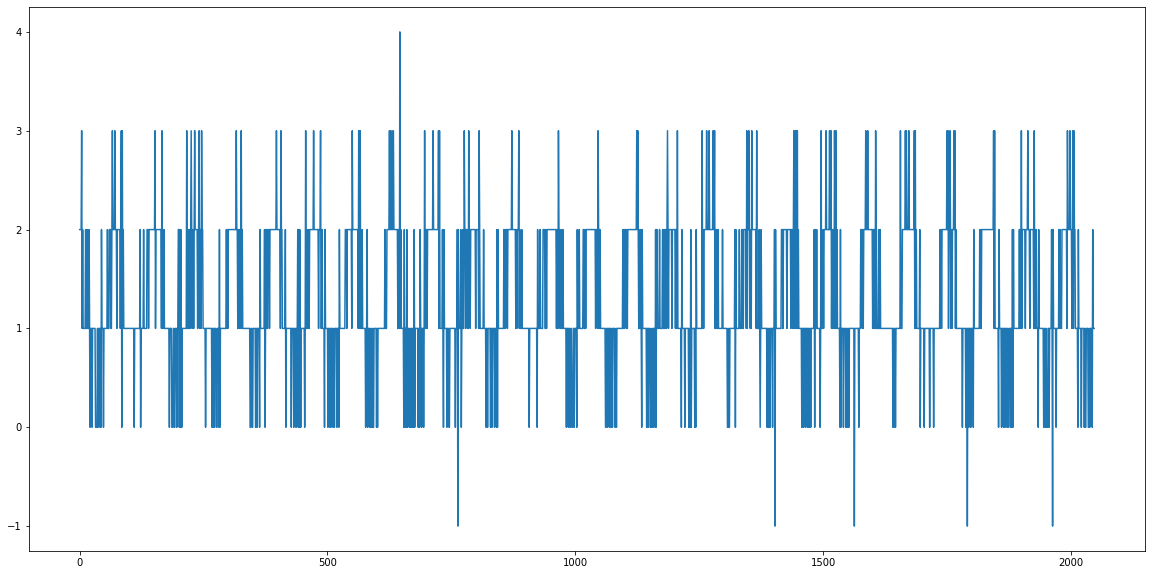

In [3]:
tm4 = acq.check_input(tm4_input)
tm4.inspect_maser()
#tm4.plot_single_input_diagnostics()
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(tm4.time_streams[0])

In [4]:
tm4_clock = analyse_maser(folder_path, tm4_input)

C:\Users\audre\Documents\WVU REU 2022\6.24 2000 fps\000000
Loaded raw acq HDF5 file ... .....................................................................] 0/1
Checking input [0, 0, 12] ... 
Done Computing Delay: ############################################################################] 1/1

DONE reading files and getting delays


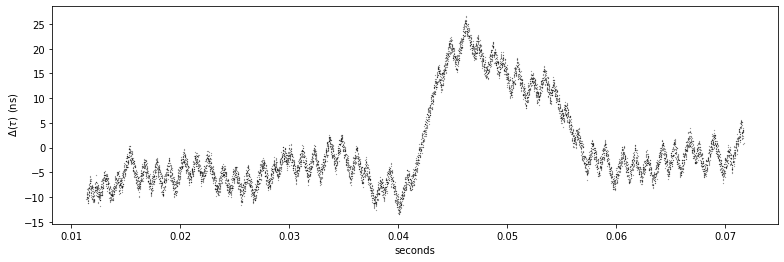

In [5]:
tm4_delays = tm4_clock.plot_delays()

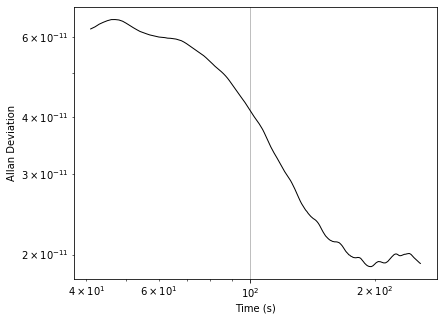

In [7]:
tm4_clock.get_allan_deviation()

Checking input [0, 0, 3] ... 


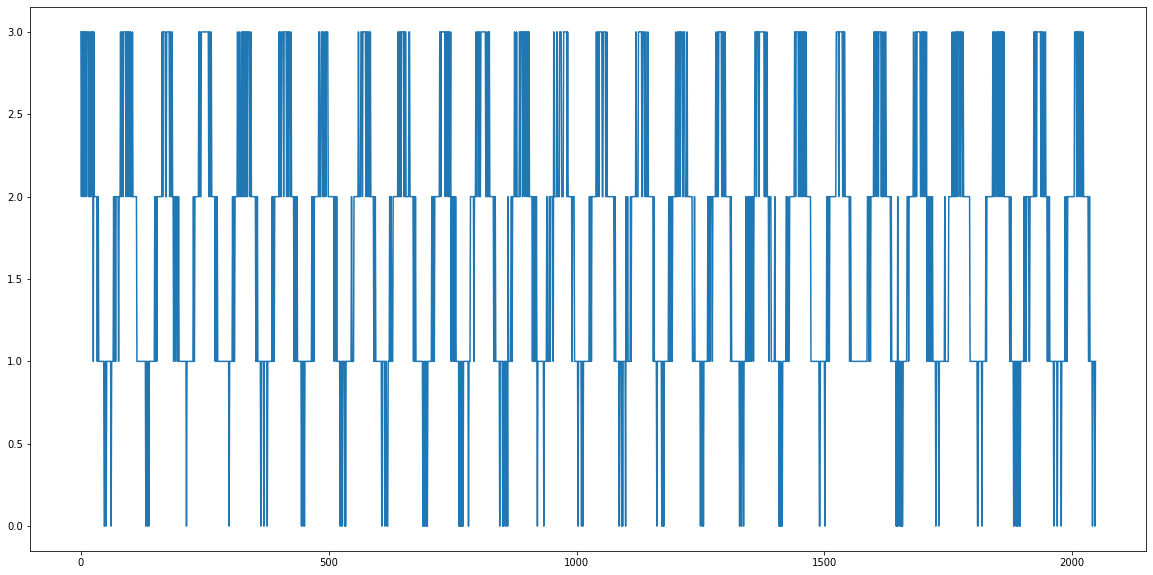

In [8]:
tm5101 = acq.check_input(tm5101_input)
tm5101.inspect_maser()
#tm5101.plot_single_input_diagnostics()
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(tm5101.time_streams[1])

In [9]:
tm5101_clock = analyse_maser(folder_path, tm5101_input)

C:\Users\audre\Documents\WVU REU 2022\6.24 2000 fps\000000
Loaded raw acq HDF5 file ... .....................................................................] 0/1
Checking input [0, 0, 3] ... 
Done Computing Delay: ############################################################################] 1/1

DONE reading files and getting delays


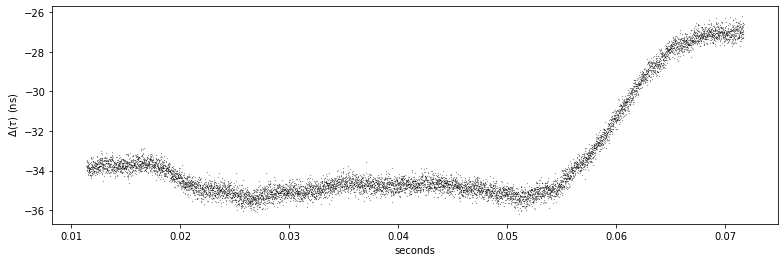

In [10]:
tm5101_delays = tm5101_clock.plot_delays()

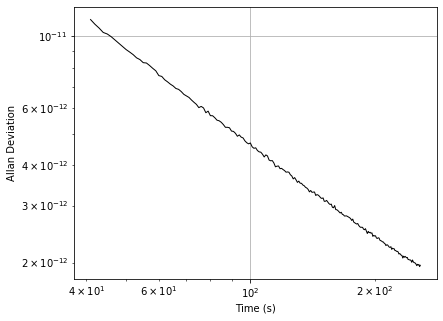

In [11]:
tm5101_clock.get_allan_deviation()

In [ ]:
acq.diagostics()

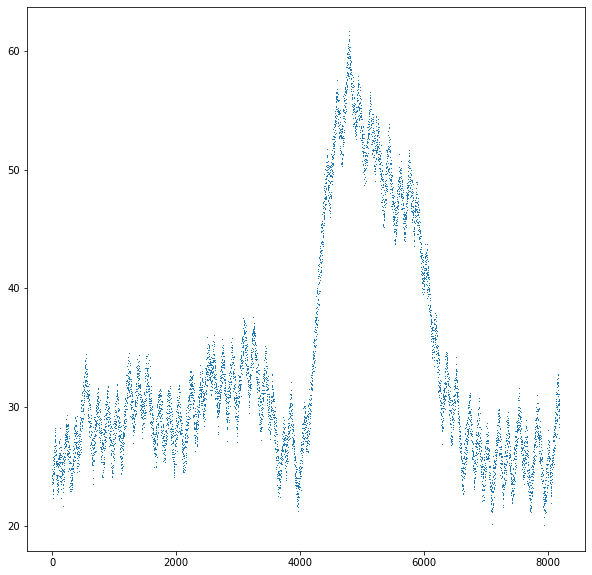

In [17]:
tm_compare = (tm4_clock.taus - tm5101_clock.taus[:8191])/1e-9

plt.figure(figsize=(10,10))
plt.plot(tm_compare, ',')